In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

In [4]:
dataset=pd.read_csv('/content/framingham.csv')
dataset.drop(['education'],axis=1,inplace=True)
dataset.head()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
dataset.dropna(axis=0, inplace=True)
dataset.shape

(3751, 15)

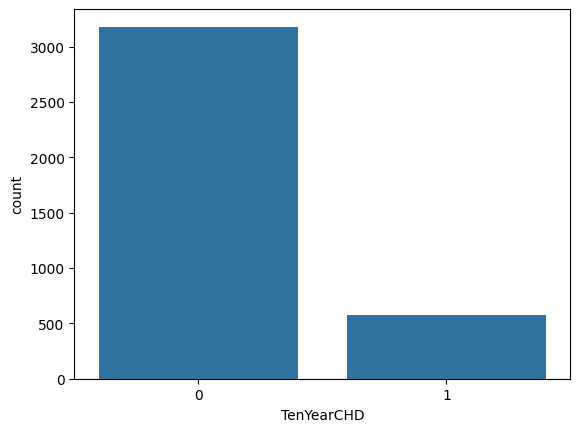

There are 3179 patients without heart disease and 572 patients with the disease


In [7]:
sns.countplot(x='TenYearCHD',data=dataset)
plt.show()
cases = dataset.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

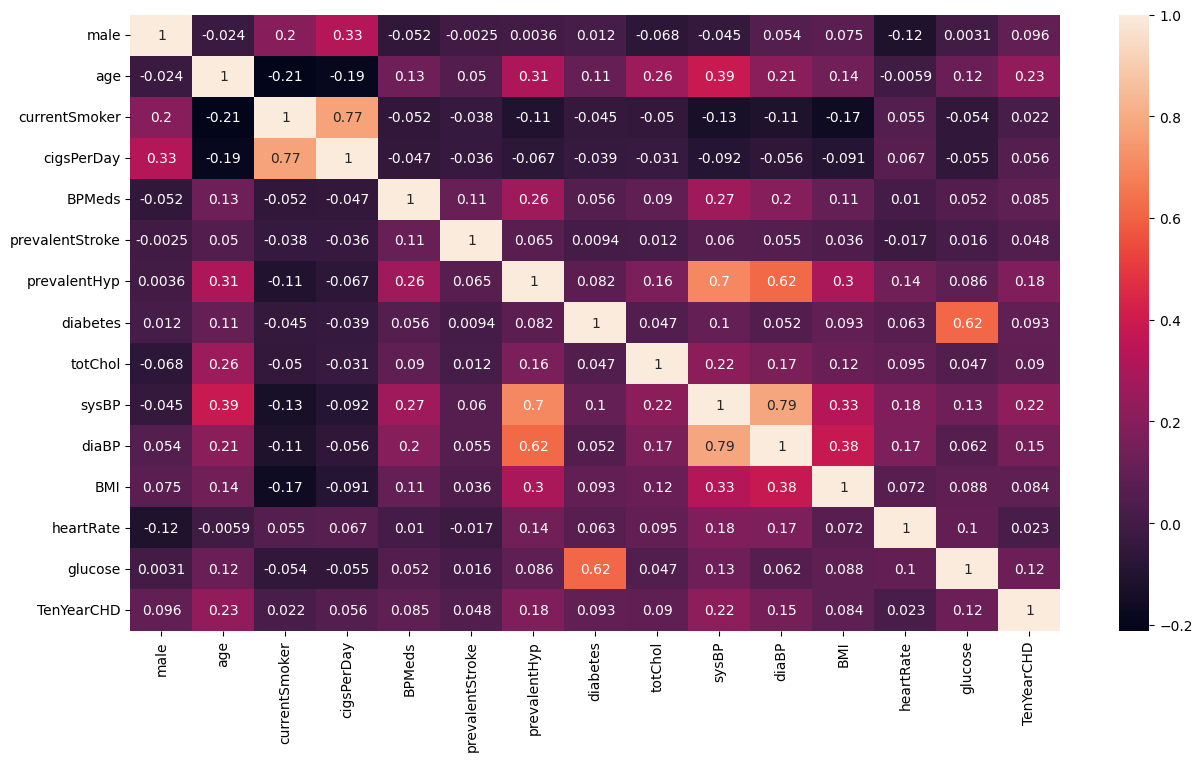

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
!pip install boruta
from boruta import BorutaPy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.4 MB/s eta 0:00:00


In [12]:
#define the features
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7C6353FC5E40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7C6353FC5E40, verbose=2)

In [14]:
# show the most important features
most_important = dataset.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

In [16]:
# select the top 6 features
top_features = dataset.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [17]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [19]:
X = dataset[top_features]
y = dataset.iloc[:,-1]
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

In [20]:
print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


In [21]:
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2000,49,350.0,174.0,90.0,18.44,110.0,78.0,0
1801,39,262.0,126.0,91.0,31.38,72.0,84.0,0
401,47,234.0,127.5,83.5,27.65,85.0,89.0,0
386,45,240.0,141.0,89.0,25.01,95.0,76.0,0
94,48,265.0,145.0,77.0,24.23,74.0,64.0,0


In [22]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
2000,49,350.0,174.0,90.0,18.44,110.0,78.0
1801,39,262.0,126.0,91.0,31.38,72.0,84.0
401,47,234.0,127.5,83.5,27.65,85.0,89.0
386,45,240.0,141.0,89.0,25.01,95.0,76.0
94,48,265.0,145.0,77.0,24.23,74.0,64.0


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [25]:

dt_scores=[]
cr_scores=[]
for cr in ['gini', 'entropy']:
  for i in range(1,len (X.columns)+1):
    dt_classifier=DecisionTreeClassifier (criterion=cr,max_features=i, random_state=42)
    dt_classifier.fit(X_train,y_train)
    dt_scores.append(dt_classifier.score (X_test, y_test))
  print (f'BEST MAX_Features for {cr}: {np.argmax (dt_scores)+1}')
  cr_scores.append(dt_scores [np.argmax(dt_scores)])
print (f'Best Criterion: {"gini" if not np.argmax(cr_scores) else "entropy"}')

BEST MAX_Features for gini: 6
BEST MAX_Features for entropy: 9
Best Criterion: entropy


In [26]:

dt_classifier=DecisionTreeClassifier (criterion='gini', max_features=12, random_state=42)
dt_classifier.fit(X_train,y_train)
b=dt_classifier.score(X_test,y_test)
print(b)

0.7283842794759825


In [27]:

svc_scores=[]
kernels=['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
  svc_scores_c=[]
  for ch in range(1,11):
    if kernels[i]=='poly':
      svc_scores_poly=[]
      for d in range(3,10):
        svc_classifier=SVC (kernel=kernels[i],C=ch, degree=d)
        svc_classifier.fit(X_train, y_train)
        svc_scores_poly.append(svc_classifier.score (X_test,y_test))
      print (f'Best polynomial score: {np.argmax (svc_scores_poly)+3}')
      svc_scores_c.append(svc_scores_poly [np.argmax (svc_scores_poly)])
    else:
      svc_classifier=SVC (kernel=kernels[i], C=ch)
      svc_classifier.fit(X_train, y_train)
      svc_scores_c.append(svc_classifier.score (X_test, y_test))
  print (f'Best choice of c for {kernels[i]}: {np.argmax (svc_scores_c)+1}')
  svc_scores.append(svc_scores_c[np.argmax(svc_scores_c)])
print(f'Best choice of k: {kernels [np.argmax(svc_scores)]}')

Best choice of c for linear: 1
Best polynomial score: 9
Best polynomial score: 8
Best polynomial score: 9
Best polynomial score: 9
Best polynomial score: 9
Best polynomial score: 9
Best polynomial score: 5
Best polynomial score: 5
Best polynomial score: 5
Best polynomial score: 5
Best choice of c for poly: 10
Best choice of c for rbf: 9
Best choice of c for sigmoid: 3
Best choice of k: rbf


In [31]:

svc_classifier= SVC (kernel='rbf', C=9)
svc_classifier.fit(X_train,y_train)
a=svc_classifier.score (X_test,y_test)
print(a)

0.7283842794759825


In [41]:

#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
rf_accuracy=accuracy_score (y_test,y_pred)
print (rf_accuracy*100)


81.75765645805593


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       622
           1       0.42      0.04      0.07       129

    accuracy                           0.83       751
   macro avg       0.62      0.51      0.49       751
weighted avg       0.76      0.83      0.76       751



In [36]:

#NaiveBayes
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier= GaussianNB()
classifier.fit(X_train, y_train)
naive_pred = classifier.predict(X_test)
naive_accuracy=metrics.accuracy_score (y_test,naive_pred)
print('Accuracy Score:')
print(naive_accuracy*100)

from sklearn.metrics import classification_report
print(classification_report(y_test,naive_pred))

Accuracy Score:
65.41484716157206
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       647
           1       0.65      0.44      0.53       498

    accuracy                           0.65      1145
   macro avg       0.65      0.63      0.63      1145
weighted avg       0.65      0.65      0.64      1145



In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example: Replace X, y with your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8175765645805593
Confusion Matrix:
 [[607  15]
 [122   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       622
           1       0.32      0.05      0.09       129

    accuracy                           0.82       751
   macro avg       0.58      0.52      0.50       751
weighted avg       0.74      0.82      0.76       751



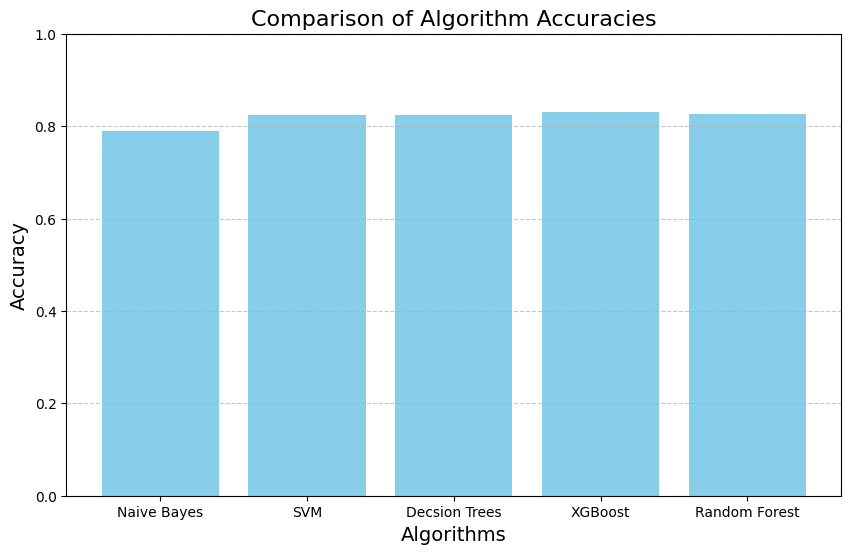

In [42]:
import matplotlib.pyplot as plt

# Example data: Replace with your actual results
models = ['Naive Bayes', 'SVM', 'Decsion Trees', 'XGBoost','Random Forest']  # Names of your algorithms
accuracies = [0.79, 0.823, 0.825,0.83,0.827]  # Replace with accuracy values for each model

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Algorithm Accuracies', fontsize=16)
plt.ylim(0, 1)  # Set limit based on your accuracy scale (0-1 or 0-100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
